In [13]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

import os

%matplotlib inline

## 1. Solving Underdetermined Problems

### Part a

In [29]:
def phi(x, p):
    return np.linalg.norm(x, ord=p) ** p

### Part b

In [35]:
def solve1(p):
    
    A = np.array([[1, 2]])
    b = 5
    cons = (
        {
            'type': 'eq',
            'fun': lambda x: A @ x - b
        })
    res = optimize.minimize(phi, np.zeros((A.shape[1],)), args=(p),
               constraints=cons, method='SLSQP', options={'disp': False})
    
    return res.x, phi(res.x, p)

### Part c, d

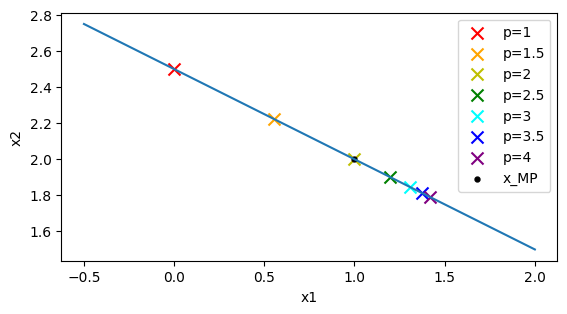

In [76]:
x1 = np.linspace(-0.5, 2., num=2)
x2 = (5. - x1) / 2.
plt.plot(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
ax = plt.gca()
ax.set_aspect(1)

x_hat, phi_hat = solve1(1)
x, y = x_hat
plt.scatter(x, y, s=75, label='p=1', c='red', marker='x')

x_hat, phi_hat = solve1(1.5)
x, y = x_hat
plt.scatter(x, y, s=75, label='p=1.5', c='orange', marker='x')

x_hat, phi_hat = solve1(2)
x, y = x_hat
plt.scatter(x, y, s=75, label='p=2', c='y', marker='x')

x_hat, phi_hat = solve1(2.5)
x, y = x_hat
plt.scatter(x, y, s=75, label='p=2.5', c='green', marker='x')

x_hat, phi_hat = solve1(3)
x, y = x_hat
plt.scatter(x, y, s=75, label='p=3', c='cyan', marker='x')

x_hat, phi_hat = solve1(3.5)
x, y = x_hat
plt.scatter(x, y, s=75, label='p=3.5', c='blue', marker='x')

x_hat, phi_hat = solve1(4)
x, y = x_hat
plt.scatter(x, y, s=75, label='p=4', c='purple', marker='x')

A = np.array([[1, 2]])
b = np.array([[5]])
x_mp = A.T @ np.linalg.inv(A @ A.T) @ b
x, y = x_mp
plt.scatter(x, y, s=50, label='x_MP', c='black', marker='.')

plt.legend()
plt.show()

## 2. Singular Value Decomposition

### Part a

In [52]:
def spatial_grid(n):
    return np.linspace(-1., 1., num=n)

### Part b

In [71]:
def gaussian_func(x, n, mu=0., delta=0.2):
    delta_n = 2. / (n - 1)
    return delta_n / np.sqrt(2 * np.pi) / delta * np.exp(-(x - mu) * (x - mu) / (2. * delta * delta))

### Part c

In [78]:
def convolution_matrix(n):
    x = np.array([spatial_grid(n)])
    x2d = np.tile(x, (n, 1)).T - x
    return gaussian_func(x2d, n)

### Part d

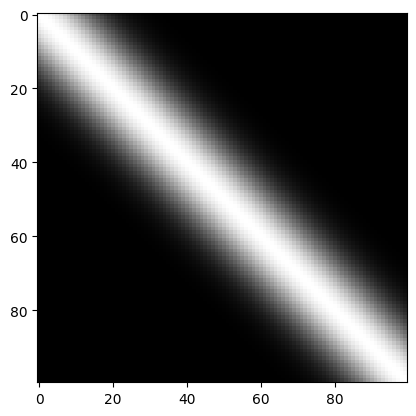

In [79]:
A = convolution_matrix(100)
plt.imshow(A, cmap='gray')

### Part e

In [80]:
def svd(A):
    u, s, vt = np.linalg.svd(A, full_matrices=True)
    return u, s, vt

In [90]:
u, s, vt = svd(A)
print(((u * s) @ vt - A < 1e-12).all())

True


### Part f

In [96]:
def pseudoinverse(A, alpha=1e-8):

    u, s, vt = svd(A)
    q = np.zeros(s.shape)
    q[(s>alpha)|(s<-alpha)] = 1.
    si = q / s
    Wi = np.diag(si)
    W = np.diag(s)
    assert (Wi @ W - np.identity(W.shape[0]) < 1e-12).all()
    assert (W @ Wi - np.identity(W.shape[0]) < 1e-12).all()

    return vt.T @ Wi @ u.T

In [99]:
n = 10
A = convolution_matrix(n)
Ai = pseudoinverse(A)
print((Ai @ A - np.identity(A.shape[0]) < 1e-12).all())
print((A @ Ai - np.identity(A.shape[0]) < 1e-12).all())

True
True


### Part g

`n = 20`

In [104]:
n = 20
A = convolution_matrix(n)
Ai = pseudoinverse(A, alpha=1e-12)
print((Ai @ A - np.identity(A.shape[0]) < 1e-12).all())
print((A @ Ai - np.identity(A.shape[0]) < 1e-12).all())

False
False


`n = 100`

In [105]:
n = 100
A = convolution_matrix(n)
Ai = pseudoinverse(A, alpha=1e-12)
print((Ai @ A - np.identity(A.shape[0]) < 1e-12).all())
print((A @ Ai - np.identity(A.shape[0]) < 1e-12).all())

False
False


In [110]:
u, s, vt = svd(A)
v = vt.T

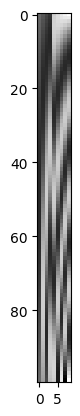

In [111]:
plt.imshow(v[:, :9], cmap='gray')

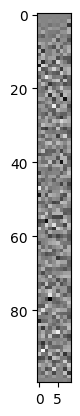

In [113]:
plt.imshow(v[:, -9:], cmap='gray')

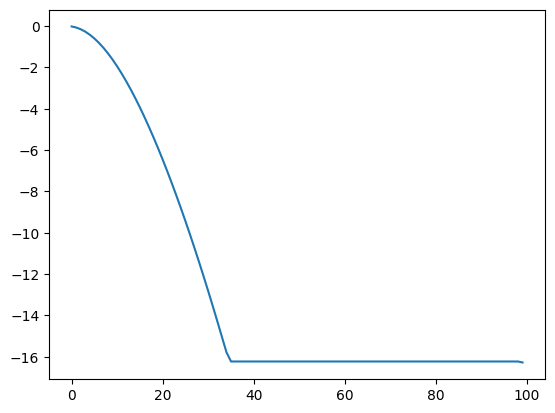

In [109]:
plt.plot(np.log10(s))
plt.show()

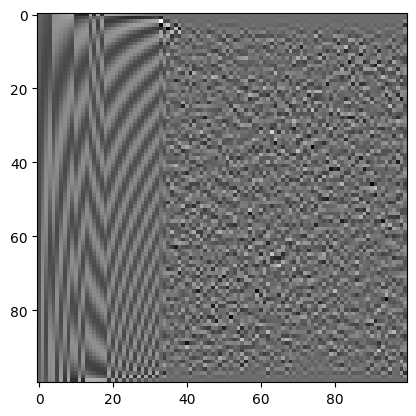

In [114]:
plt.imshow(v, cmap='gray')